In [2]:
# Download the dataset
!wget http://download.tensorflow.org/data/speech_commands_v0.02.tar.gz

# Create a new directory for extraction
!mkdir speech_commands_dataset

# Extract the dataset into the new directory
!tar -xvzf speech_commands_v0.02.tar.gz -C speech_commands_dataset

Streaming output truncated to the last 5000 lines.
./on/fc3ba625_nohash_0.wav
./on/db9d52d2_nohash_0.wav
./on/72242187_nohash_4.wav
./on/b0f5b16d_nohash_0.wav
./on/d9aa8c90_nohash_1.wav
./on/525eaa62_nohash_0.wav
./on/42e3f068_nohash_0.wav
./on/94d370bf_nohash_4.wav
./on/bf8d5617_nohash_0.wav
./on/e2b7d6d6_nohash_2.wav
./on/89ed36ab_nohash_0.wav
./on/30276d03_nohash_1.wav
./on/364c0853_nohash_0.wav
./on/7cbf645a_nohash_0.wav
./on/c98bbbd3_nohash_2.wav
./on/9a7c1f83_nohash_5.wav
./on/3589bc72_nohash_0.wav
./on/3ae5c04f_nohash_0.wav
./on/adc216c5_nohash_2.wav
./on/c50f55b8_nohash_15.wav
./on/324210dd_nohash_2.wav
./on/c120e80e_nohash_2.wav
./on/69086eb0_nohash_0.wav
./on/dce05676_nohash_1.wav
./on/435695e3_nohash_1.wav
./on/179a61b7_nohash_1.wav
./on/f5341341_nohash_0.wav
./on/91b03183_nohash_0.wav
./on/96d8bb6f_nohash_2.wav
./on/6a1908f8_nohash_0.wav
./on/6ace4fe1_nohash_1.wav
./on/84d1e469_nohash_1.wav
./on/ba676390_nohash_0.wav
./on/1dc86f91_nohash_4.wav
./on/3a929277_nohash_2.wav
./o

In [3]:
import os

# Define the path where the dataset was extracted
data_dir = './speech_commands_dataset'

# List the directories (words)
categories = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]

# Display the categories
print(f"Available categories: {categories}")
print(f"Number of categories: {len(categories)}")


Available categories: ['right', 'eight', 'two', 'on', 'dog', 'bed', 'no', 'nine', 'cat', 'one', 'up', 'five', 'backward', 'left', 'learn', 'marvin', 'go', 'follow', 'tree', 'off', 'stop', 'zero', 'six', 'visual', 'down', 'forward', 'happy', 'house', 'three', '_background_noise_', 'sheila', 'wow', 'seven', 'four', 'yes', 'bird']
Number of categories: 36


In [4]:
import glob

# Initialize a dictionary to hold the count of files per category
word_counts = {}

# Loop through each category and count the number of audio files
for word in categories:
    word_path = os.path.join(data_dir, word)
    num_files = len(glob.glob(os.path.join(word_path, '*.wav')))
    word_counts[word] = num_files

# Display the word counts
for word, count in word_counts.items():
    print(f"{word}: {count} samples")


right: 3778 samples
eight: 3787 samples
two: 3880 samples
on: 3845 samples
dog: 2128 samples
bed: 2014 samples
no: 3941 samples
nine: 3934 samples
cat: 2031 samples
one: 3890 samples
up: 3723 samples
five: 4052 samples
backward: 1664 samples
left: 3801 samples
learn: 1575 samples
marvin: 2100 samples
go: 3880 samples
follow: 1579 samples
tree: 1759 samples
off: 3745 samples
stop: 3872 samples
zero: 4052 samples
six: 3860 samples
visual: 1592 samples
down: 3917 samples
forward: 1557 samples
happy: 2054 samples
house: 2113 samples
three: 3727 samples
_background_noise_: 6 samples
sheila: 2022 samples
wow: 2123 samples
seven: 3998 samples
four: 3728 samples
yes: 4044 samples
bird: 2064 samples


In [5]:
import librosa
import numpy as np

# Initialize an empty list to store the durations of all audio files
durations = []

# Loop through each category and load the audio files
for word in categories:
    word_path = os.path.join(data_dir, word)
    for wav_file in glob.glob(os.path.join(word_path, '*.wav')):
        # Load the audio file using librosa
        y, sr = librosa.load(wav_file, sr=None)
        # Compute the duration and append to the list
        durations.append(librosa.get_duration(y=y, sr=sr))

# Convert durations list to a numpy array for statistical analysis
durations = np.array(durations)

# Print basic statistics about the durations
print(f"Mean duration: {np.mean(durations)} seconds")
print(f"Standard deviation: {np.std(durations)} seconds")
print(f"Max duration: {np.max(durations)} seconds")
print(f"Min duration: {np.min(durations)} seconds")


Mean duration: 0.9846485000236217 seconds
Standard deviation: 0.5082371690052288 seconds
Max duration: 95.183125 seconds
Min duration: 0.2133125 seconds


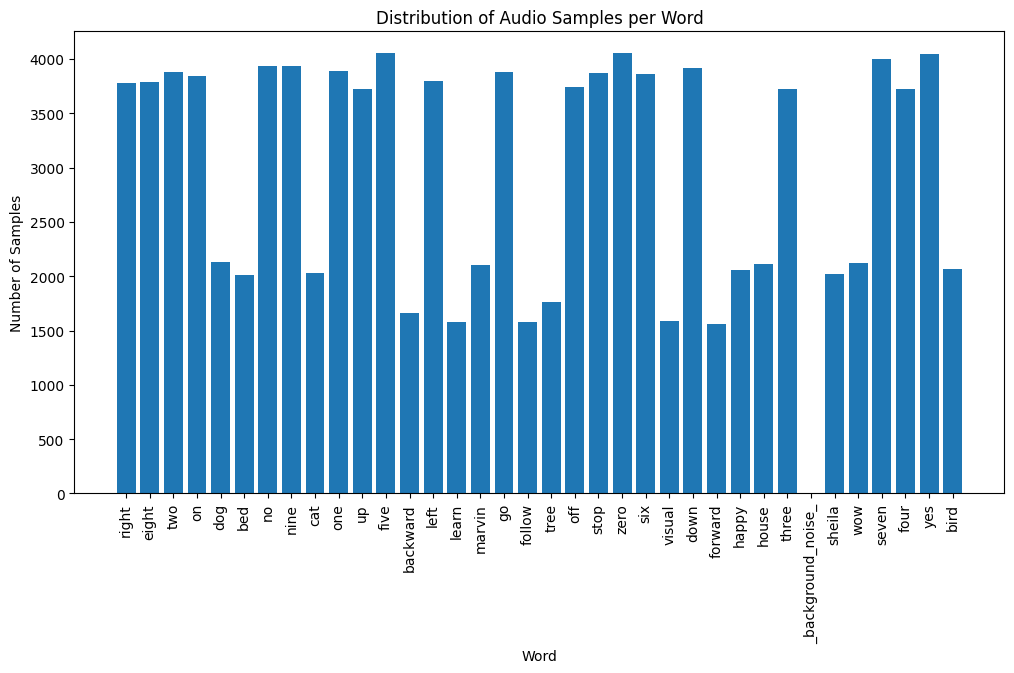

In [6]:
import matplotlib.pyplot as plt

# Plot the distribution of audio samples per word
plt.figure(figsize=(12, 6))
plt.bar(word_counts.keys(), word_counts.values())
plt.xticks(rotation=90)
plt.title('Distribution of Audio Samples per Word')
plt.xlabel('Word')
plt.ylabel('Number of Samples')
plt.show()


In [9]:
import os
import numpy as np
import pandas as pd
import librosa
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define constants
DATA_DIR = './speech_commands_dataset'
SAMPLE_RATE = 16000
DURATION = 1.0
N_MFCC = 13
N_FFT = 2048
HOP_LENGTH = 512

def load_data(data_dir):
    data = []
    labels = []
    categories = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
    for category in categories:
        path = os.path.join(data_dir, category)
        for file in os.listdir(path):
            if file.endswith('.wav'):
                file_path = os.path.join(path, file)
                audio, _ = librosa.load(file_path, sr=SAMPLE_RATE, duration=DURATION)
                if len(audio) == SAMPLE_RATE:
                    mfccs = librosa.feature.mfcc(y=audio, sr=SAMPLE_RATE, n_mfcc=N_MFCC, n_fft=N_FFT, hop_length=HOP_LENGTH)
                    data.append(mfccs)
                    labels.append(category)
    return np.array(data), np.array(labels)

# Load and preprocess data
X, y = load_data(DATA_DIR)
X = np.expand_dims(X, axis=-1)  # Add channel dimension for CNN




In [13]:
# Adjust X shape if necessary
if len(X.shape) == 3:
    # If X is already in the shape (samples, time_steps, features)
    pass
elif len(X.shape) == 4:
    # If X is in the shape (samples, features, time_steps, 1)
    X = np.squeeze(X, axis=-1)
    X = X.transpose(0, 2, 1)
else:
    raise ValueError(f"Unexpected shape of X: {X.shape}")

print("Adjusted X shape:", X.shape)

# Encode labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

Adjusted X shape: (95400, 32, 13)


In [14]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (76320, 32, 13)
y_train shape: (76320,)
X_test shape: (19080, 32, 13)
y_test shape: (19080,)


In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X.shape[1], X.shape[2])),
    tf.keras.layers.Conv1D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Conv1D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Conv1D(64, 3, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(y)), activation='softmax')
])

# Print model summary
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 30, 32)              │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 15, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 13, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 6, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 4, 64)               │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 64)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 36)                  │           2,340 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,340 (102.89 KB)

 Trainable params: 26,340 (102.89 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1908/1908 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.3611 - loss: 3.1211 - val_accuracy: 0.7486 - val_loss: 0.8533
Epoch 2/10
1908/1908 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7797 - loss: 0.7506 - val_accuracy: 0.8201 - val_loss: 0.6244
Epoch 3/10
1908/1908 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8312 - loss: 0.5724 - val_accuracy: 0.8396 - val_loss: 0.5408
Epoch 4/10
1908/1908 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.8546 - loss: 0.4868 - val_accuracy: 0.8550 - val_loss: 0.5056
Epoch 5/10
1908/1908 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.8690 - loss: 0.4312 - val_accuracy: 0.8574 - val_loss: 0.4996
Epoch 6/10
1908/1908 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8828 - loss: 0.3898 - val_accuracy: 0.8657 - val_loss: 0.4733
Epoch 7/10
1908/1908 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8900 - loss: 0.3615 - val_accuracy: 0.8747 - val_loss: 0.4317
Epoch 8/10
1908/1908 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8952 - loss: 0

597/597 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8714 - loss: 0.4631
Test accuracy: 0.8734800815582275
597/597 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                    precision    recall  f1-score   support

_background_noise_       0.00      0.00      0.00         1
          backward       0.93      0.88      0.91       337
               bed       0.74      0.82      0.78       346
              bird       0.89      0.78      0.83       358
               cat       0.90      0.86      0.88       329
               dog       0.83      0.82      0.83       345
              down       0.94      0.83      0.88       746
             eight       0.89      0.93      0.91       634
              five       0.90      0.90      0.90       812
            follow       0.71      0.78      0.74       255
           forward       0.80      0.73      0.76       313
              four       0.74      0.87      0.80       658
                go       0.63      0.91      0.75       696
             happy       0.96      0.91      0.93       358
             house       0.95      0.90      0.93       379
             learn       0.88      0.66

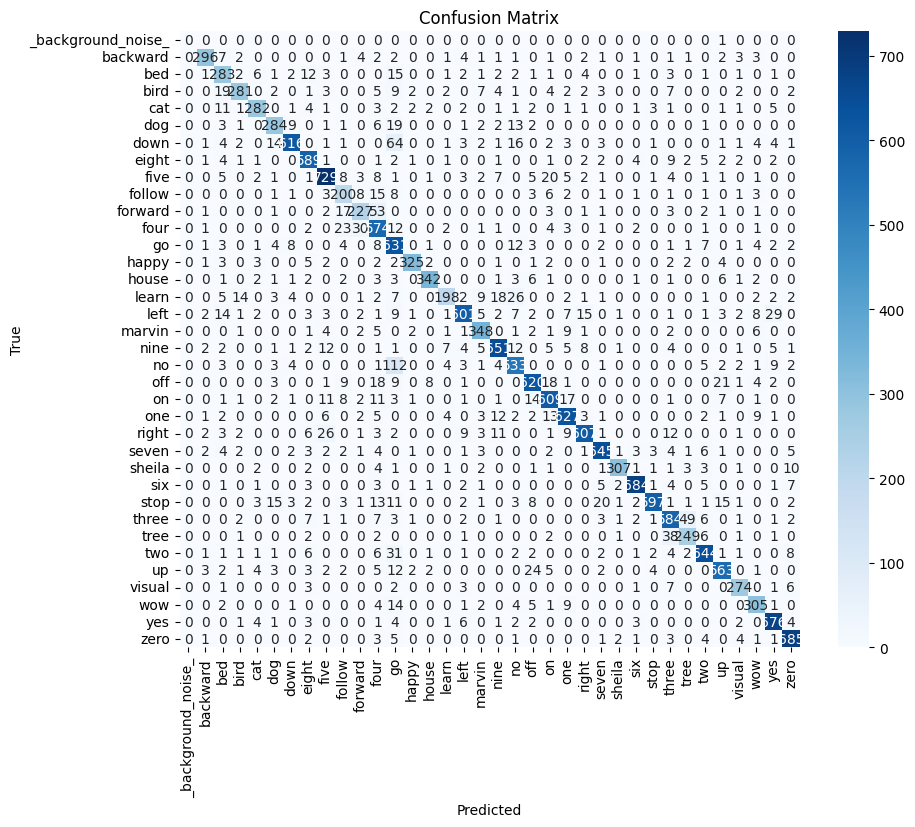

In [16]:

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

# Generate classification report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes, target_names=le.classes_))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



In [43]:
!pip install pydub

In [56]:
import sys
import os
import numpy as np
import torch
import torchaudio
import ipywidgets as widgets
from IPython import display as ipd
from google.colab import output as colab_output
from base64 import b64decode
from io import BytesIO
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from google.colab import files
from scipy.io import wavfile
import wave

def record(seconds=1):
    RECORD = (
        b"const sleep  = time => new Promise(resolve => setTimeout(resolve, time))\n"
        b"const b2text = blob => new Promise(resolve => {\n"
        b"  const reader = new FileReader()\n"
        b"  reader.onloadend = e => resolve(e.srcElement.result)\n"
        b"  reader.readAsDataURL(blob)\n"
        b"})\n"
        b"var record = time => new Promise(async resolve => {\n"
        b"  stream = await navigator.mediaDevices.getUserMedia({ audio: true })\n"
        b"  recorder = new MediaRecorder(stream)\n"
        b"  chunks = []\n"
        b"  recorder.ondataavailable = e => chunks.push(e.data)\n"
        b"  recorder.start()\n"
        b"  await sleep(time)\n"
        b"  recorder.onstop = async ()=>{\n"
        b"    blob = new Blob(chunks)\n"
        b"    text = await b2text(blob)\n"
        b"    resolve(text)\n"
        b"  }\n"
        b"  recorder.stop()\n"
        b"})"
    )
    RECORD = RECORD.decode("ascii")

    print(f"Recording started for {seconds} seconds.")
    ipd.display(ipd.Javascript(RECORD))
    s = colab_output.eval_js("record(%d)" % (seconds * 1000))
    print("Recording ended.")
    return b64decode(s.split(",")[1])

def save_wav(data, filename, sample_rate=16000):
    with wave.open(filename, 'wb') as wf:
        wf.setnchannels(1)
        wf.setsampwidth(2)
        wf.setframerate(sample_rate)
        wf.writeframes(data)

def create_dataset(commands, num_samples=30, duration=1, sample_rate=16000):
    dataset = []
    labels = []

    # Calculate expected number of samples
    expected_samples = int(duration * sample_rate)

    # Create a main directory for the dataset
    dataset_dir = "voice_command_dataset"
    os.makedirs(dataset_dir, exist_ok=True)

    for command in commands:
        print(f"Recording {num_samples} samples for command: {command}")
        # Create a subdirectory for each command
        command_dir = os.path.join(dataset_dir, command)
        os.makedirs(command_dir, exist_ok=True)

        for i in range(num_samples):
            input(f"Press Enter to start recording sample {i+1}/{num_samples} for '{command}'...")
            audio_data = record(duration)

            # Save the audio data as a WAV file
            filename = f"{command}_{i+1}.wav"
            filepath = os.path.join(command_dir, filename)
            save_wav(audio_data, filepath, sample_rate)

            # Load the saved WAV file using torchaudio
            waveform, sr = torchaudio.load(filepath)

            # Ensure consistent length
            if waveform.shape[1] < expected_samples:
                # Pad if too short
                padding = expected_samples - waveform.shape[1]
                waveform = torch.nn.functional.pad(waveform, (0, padding))
            elif waveform.shape[1] > expected_samples:
                # Truncate if too long
                waveform = waveform[:, :expected_samples]

            dataset.append(waveform.numpy())
            labels.append(command)

            print(f"Saved {filename}")

    print(f"Dataset saved in '{dataset_dir}' directory")
    return np.array(dataset), np.array(labels)

def preprocess_data(waveforms, sample_rate, n_mfcc=13, n_fft=2048, hop_length=512):
    mfccs = []
    for waveform in waveforms:
        mfcc = torchaudio.transforms.MFCC(
            sample_rate=sample_rate,
            n_mfcc=n_mfcc,
            melkwargs={'n_fft': n_fft, 'hop_length': hop_length}
        )(waveform)
        mfccs.append(mfcc.numpy())
    return np.array(mfccs)

# Assuming 'model' is your pre-trained model
# and 'commands' is the list of command labels

# Record new dataset
commands = ["up", "down", "left", "right", "stop"]  # Adjust this list as needed
X_new, y_new = create_dataset(commands, num_samples=3, duration=1)

# Preprocess the new data
X_new_processed = preprocess_data(X_new, sample_rate=16000)

# Split the new data into training and testing sets
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new_processed, y_new, test_size=0.2, random_state=42)

# Adjust data shape to match model input if necessary
X_new_train = X_new_train.transpose(0, 2, 1)
X_new_test = X_new_test.transpose(0, 2, 1)

# Fine-tune the model
history = model.fit(X_new_train, y_new_train, epochs=10, validation_split=0.2, batch_size=32)


Recording 3 samples for command: up


KeyboardInterrupt: Interrupted by user

In [ ]:

# Evaluate the fine-tuned model
test_loss, test_acc = model.evaluate(X_new_test, y_new_test)
print(f'Fine-tuned test accuracy: {test_acc}')

In [52]:
y_pred = model.predict(X_new_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_new_test, y_pred_classes, target_names=commands))

# Plot confusion matrix
cm = confusion_matrix(y_new_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=commands, yticklabels=commands)
plt.title('Confusion Matrix (Fine-tuned)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy during Fine-tuning')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss during Fine-tuning')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Zip the dataset for easy download
!zip -r voice_command_dataset.zip voice_command_dataset

# Provide download link
files.download('voice_command_dataset.zip')

Recording 30 samples for command: up
Press Enter to start recording sample 1/30 for 'up'...up


<IPython.core.display.Javascript object>

Recording for 1 seconds...
Recording finished.


ValueError: buffer size must be a multiple of element size

In [59]:
import tensorflow as tf
import numpy as np
import os
import hashlib
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

save_path = '/content/drive/My Drive/speech_command_assets'
os.makedirs(save_path, exist_ok=True)

# Save model
model_path = os.path.join(save_path, 'speech_command_model.keras')
model.save(model_path)
print(f"Model saved to {model_path}")

# Save dataset
dataset_path = os.path.join(save_path, 'speech_command_dataset.npz')
np.savez(dataset_path, X=X_new, y=y_new)
print(f"Dataset saved to {dataset_path}")

# Function to compute MD5 checksum
def compute_md5(file_path):
    with open(file_path, 'rb') as file:
        md5_hash = hashlib.md5()
        for chunk in iter(lambda: file.read(4096), b""):
            md5_hash.update(chunk)
    return md5_hash.hexdigest()

# Compute and save checksums
checksums = {}
checksums['speech_command_model.keras'] = compute_md5(model_path)
checksums['speech_command_dataset.npz'] = compute_md5(dataset_path)

checksum_path = os.path.join(save_path, 'checksums.txt')
with open(checksum_path, 'w') as f:
    for file_name, checksum in checksums.items():
        f.write(f"{file_name}: {checksum}\n")

print(f"Checksums saved to {checksum_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model saved to /content/drive/My Drive/speech_command_assets/speech_command_model.keras
Dataset saved to /content/drive/My Drive/speech_command_assets/speech_command_dataset.npz
Checksums saved to /content/drive/My Drive/speech_command_assets/checksums.txt
